# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
df=pd.read_excel('startup-expansion.xlsx')
df


,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


# Data Preprocessing

In [4]:
round(df[['Marketing Spend','Revenue']].describe(),2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


In [5]:
df['City'].value_counts()

Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: City, Length: 149, dtype: int64

In [6]:
df['State'].value_counts()

California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: State, dtype: int64

In [7]:
df['City'].nunique()

149

In [8]:
df['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [9]:
df['New Expansion'].unique()

array(['Old', 'New'], dtype=object)

In [10]:
df['New Expansion'].value_counts()

Old    140
New     10
Name: New Expansion, dtype: int64

In [11]:
df['Sales Region'].value_counts()

Region 2    86
Region 1    64
Name: Sales Region, dtype: int64

In [12]:
df.duplicated().sum()

0

# EDA

In [13]:
#Data Analysis and Exploration
df.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
115,116,Woodbridge,New Jersey,Region 1,Old,3319,19811
78,79,Pueblo,Colorado,Region 2,Old,2928,19563
126,127,Cedar Rapids,Iowa,Region 1,Old,2553,52072
58,59,Ventura,California,Region 2,Old,3228,16652
57,58,Waterbury,Connecticut,Region 1,Old,3392,19350
2,3,Spokane,Washington,Region 2,Old,2768,49554
121,122,Mobile,Alabama,Region 1,Old,2838,49290
141,142,Tempe,Arizona,Region 2,New,2911,48954
123,124,Daly City,California,Region 2,Old,2658,20703
21,22,Modesto,California,Region 2,Old,3077,56836


<AxesSubplot:xlabel='Sales Region', ylabel='count'>

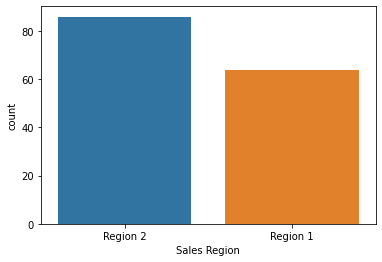

In [14]:
sns.countplot(x='Sales Region',data=df)

In [15]:
df[df['New Expansion']=='Old'].groupby('City').max()['Revenue'].nlargest(10)

City
Little Rock       68828
Grand Rapids      65475
Rochester         64906
Oxnard            64302
Fontana           63027
Providence        62337
Birmingham        60338
Overland Park     59887
San Bernardino    59870
Worcester         59840
Name: Revenue, dtype: int64

In [16]:
df[df['New Expansion']=='New'].groupby('City').max()['Revenue'].nlargest(10)

City
Brownsville         63148
Chattanooga         55357
Rancho Cucamonga    52366
Glendale            49376
Tempe               48954
Joliet              48315
Rockford            43377
Thousand Oaks       40141
Paterson            34603
College Station     22457
Name: Revenue, dtype: int64

In [17]:
df['profit']=df['Revenue']-df['Marketing Spend']

In [22]:
df["ROMS"]=round((df['profit']/df['Marketing Spend']),2)

In [23]:
df

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,profit,ROMS
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,17.69
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,15.75
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,16.90
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,12.88
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,19.87
...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,14.37
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,16.18
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,15.38
148,149,College Station,Texas,Region 2,New,2994,22457,19463,6.50


In [24]:
df.to_csv('startup.csv')